# Libraries

All imports

In [18]:
import autoencoder
import visualization

from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Load and prepare data
Importing and preprocessing of images into a image dataset

In [19]:
image_dir = "../dataset/AUTO_Input/train/"
image_size = (128, 128)

images = autoencoder.create_image_dataset(image_dir, image_size)

Found 209 files.


# Build and compile autoencoder

In [20]:
ae = autoencoder.build_and_compile(image_size)
ae.summary()

(32, 32, 32)
32768


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1024)           │    33,555,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32768)          │    33,587,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_6              │ (None, 64, 64, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_7              │ (None, 128, 128, 32)   │         9,248 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 67,181,667 (256.28 MB)

 Trainable params: 67,181,539 (256.28 MB)

 Non-trainable params: 128 (512.00 B)

# Create train test split

In [21]:
train, test = train_test_split(images, test_size=0.2)

# Train the model

In [22]:
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_delta=0.0005)
early_stop = EarlyStopping(monitor="val_loss", patience=5, min_delta=0.0002, restore_best_weights=True)
callbacks = [reduce_lr, early_stop]

history = autoencoder.fit_model(ae, train, epochs=20, batch_size=32, callbacks=callbacks)

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - loss: 0.0741 - val_loss: 0.0684 - learning_rate: 5.0000e-04
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - loss: 0.0363 - val_loss: 0.0376 - learning_rate: 5.0000e-04
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 0.0182 - val_loss: 0.0159 - learning_rate: 5.0000e-04
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.0076 - val_loss: 0.0112 - learning_rate: 5.0000e-04
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - loss: 0.0055 - val_loss: 0.0069 - learning_rate: 5.0000e-04
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 0.0032 - val_loss: 0.0053 - learning_rate: 5.0000e-04
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 58s 1s/step - loss: 0.0025 - val_loss: 0.0036 - learning_rate: 5.0000e-04
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 59s 1s/step - loss: 0.0021 - val_loss: 0.0030 - learning_rate: 5.0000e-04
Epoch 9/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 60s 1s/step - loss: 0.0019 - val_loss: 0.0024 - learning_rate: 5.0

# Predict on test data

In [23]:
predictions = ae.predict(test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 134ms/step


# Visualize original image with predicted image

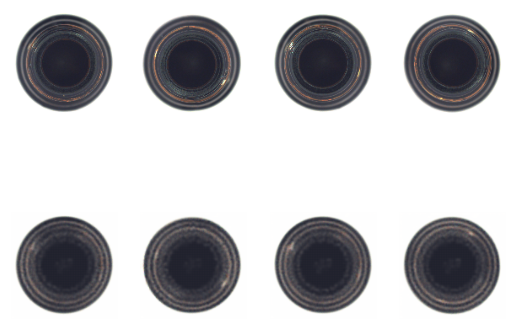

In [24]:
visualization.display_before_after(test, predictions)